Chi-Squared Test Results:
Chi-squared statistic: 592.35
p-value: 0.0000
Degrees of freedom: 24
Result: There is a statistically significant association between canton and traffic ratio class.

ANOVA Results:
F-statistic: 1687.67
p-value: 0.0000
Result: Significant differences exist in DWV/DNWV ratios between traffic classes.

Correlation Analysis:
Pearson Correlation Coefficient: 0.99
p-value: 0.0000
Result: Significant correlation between DWV and DNWV.


C:\Users\Fabian\AppData\Local\Temp\ipykernel_29572\1036816212.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Traffic_Ratio_Class', y='DWV_DNWV_Ratio', palette='Set2')


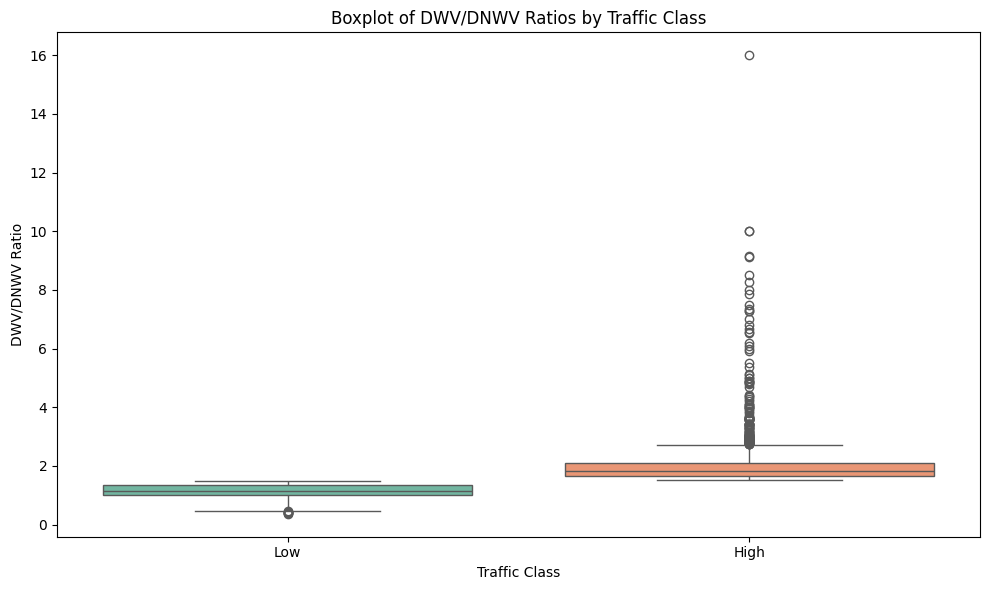

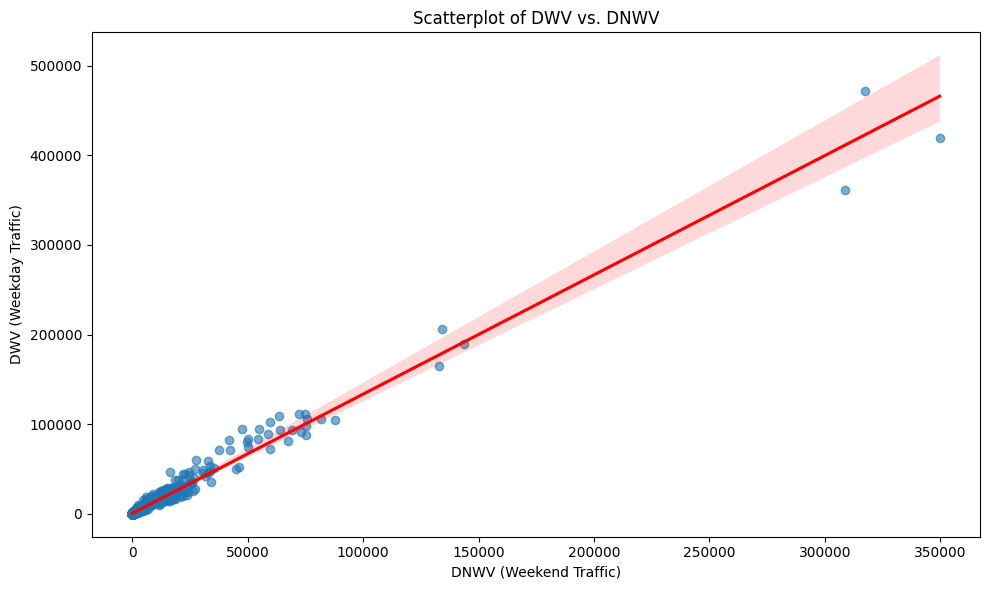

In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'data_prepared.csv'  # Replace with your actual CSV path
data = pd.read_csv(data_path)

# Preprocess the data
# Convert relevant columns to numeric if needed
for col in ['DWV', 'DNWV', 'lon', 'lat']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['DWV', 'DNWV', 'lon', 'lat'])

# Feature Engineering: Calculate DWV/DNWV ratio
data['DWV_DNWV_Ratio'] = data['DWV'] / data['DNWV']

# Add a classification column: High weekday traffic ratio > 1.5
bins = [0, 1.5, float('inf')]
labels = ["Low", "High"]
data['Traffic_Ratio_Class'] = pd.cut(data['DWV_DNWV_Ratio'], bins=bins, labels=labels)

# Chi-Squared Test: Check independence between Traffic Class and Region (Canton)
if 'Kanton' in data.columns:
    contingency_table = pd.crosstab(data['Kanton'], data['Traffic_Ratio_Class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print("Chi-Squared Test Results:")
    print(f"Chi-squared statistic: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    if p < 0.05:
        print("Result: There is a statistically significant association between canton and traffic ratio class.")
    else:
        print("Result: No significant association between canton and traffic ratio class.")

# ANOVA: Analyze variance in DWV/DNWV Ratio by Traffic Class
anova_result = stats.f_oneway(
    data[data['Traffic_Ratio_Class'] == "Low"]['DWV_DNWV_Ratio'],
    data[data['Traffic_Ratio_Class'] == "High"]['DWV_DNWV_Ratio']
)
print("\nANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"p-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Result: Significant differences exist in DWV/DNWV ratios between traffic classes.")
else:
    print("Result: No significant differences in DWV/DNWV ratios between traffic classes.")

# Correlation Analysis: Relationship between DWV and DNWV
correlation, p_value = stats.pearsonr(data['DWV'], data['DNWV'])
print("\nCorrelation Analysis:")
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Significant correlation between DWV and DNWV.")
else:
    print("Result: No significant correlation between DWV and DNWV.")

# Visualization: Boxplot for DWV/DNWV Ratios by Traffic Class
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Traffic_Ratio_Class', y='DWV_DNWV_Ratio', palette='Set2')
plt.title('Boxplot of DWV/DNWV Ratios by Traffic Class')
plt.xlabel('Traffic Class')
plt.ylabel('DWV/DNWV Ratio')
plt.tight_layout()
plt.savefig('boxplot_traffic_ratios.png')
plt.show()

# Visualization: Scatterplot for DWV vs. DNWV with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='DNWV', y='DWV', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatterplot of DWV vs. DNWV')
plt.xlabel('DNWV (Weekend Traffic)')
plt.ylabel('DWV (Weekday Traffic)')
plt.tight_layout()
plt.savefig('scatterplot_dwv_dnw.png')
plt.show()
